<a href="https://colab.research.google.com/github/DawerSP/Inteligencia-Aritificial/blob/main/trabajoenclaseDocumentoPalabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ================================
# Contar palabras en un documento DOCX
# ================================

# 1. Instalar librerías necesarias
!pip install python-docx

# 2. Importar librerías
import re
import docx
from collections import Counter
import pandas as pd

# 3. Subir archivo DOCX
from google.colab import files
uploaded = files.upload()  # Aquí seleccionas tu archivo .docx

# 4. Leer el archivo (cambia el nombre si es necesario)
file_name = list(uploaded.keys())[0]  # Obtiene el nombre del archivo subido
doc = docx.Document(file_name)

# 5. Extraer texto
text = " ".join([para.text for para in doc.paragraphs])

# 6. Normalizar y separar palabras
words = re.findall(r'\b\w+\b', text.lower())

# 7. Contar frecuencia de palabras
word_counts = Counter(words)

# 8. Mostrar las 20 más comunes
print("Las 20 palabras más frecuentes:\n")
for word, freq in word_counts.most_common(50):
    print(f"{word}: {freq}")

# 9. Guardar todas las frecuencias en un CSV
df = pd.DataFrame(word_counts.items(), columns=["Palabra", "Frecuencia"]).sort_values(by="Frecuencia", ascending=False)
df.to_csv("frecuencias_palabras.csv", index=False)

# 10. Descargar el archivo CSV
files.download("frecuencias_palabras.csv")


Saving ¿Se le debería dejar a los estudiantes universitarios usar Inteligencia Artificial_Dawer_Stiven_Patino.docx to ¿Se le debería dejar a los estudiantes universitarios usar Inteligencia Artificial_Dawer_Stiven_Patino (1).docx
Las 20 palabras más frecuentes:

la: 104
de: 103
en: 58
ia: 57
el: 57
y: 52
a: 45
los: 43
que: 40
para: 27
por: 21
estudiantes: 19
un: 18
uso: 18
al: 15
es: 15
se: 14
como: 14
con: 14
educación: 14
del: 14
o: 13
su: 13
alumnos: 12
sus: 11
no: 11
artificial: 10
puede: 10
universitarios: 9
inteligencia: 9
herramientas: 9
unesco: 9
5: 9
las: 9
lo: 9
4: 8
chatgpt: 8
profesores: 8
aprendizaje: 8
3: 7
este: 7
7: 7
usar: 6
estas: 6
respuestas: 6
riesgos: 6
información: 6
ejemplo: 6
https: 6
pueden: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving ¿Se le debería dejar a los estudiantes universitarios usar Inteligencia Artificial_Dawer_Stiven_Patino.docx to ¿Se le debería dejar a los estudiantes universitarios usar Inteligencia Artificial_Dawer_Stiven_Patino (2).docx
🔴 Palabras eliminadas (stopwords y conectores/adjetivos/adverbios):
['a', 'además', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'así', 'aunque', 'casi', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entonces', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvi

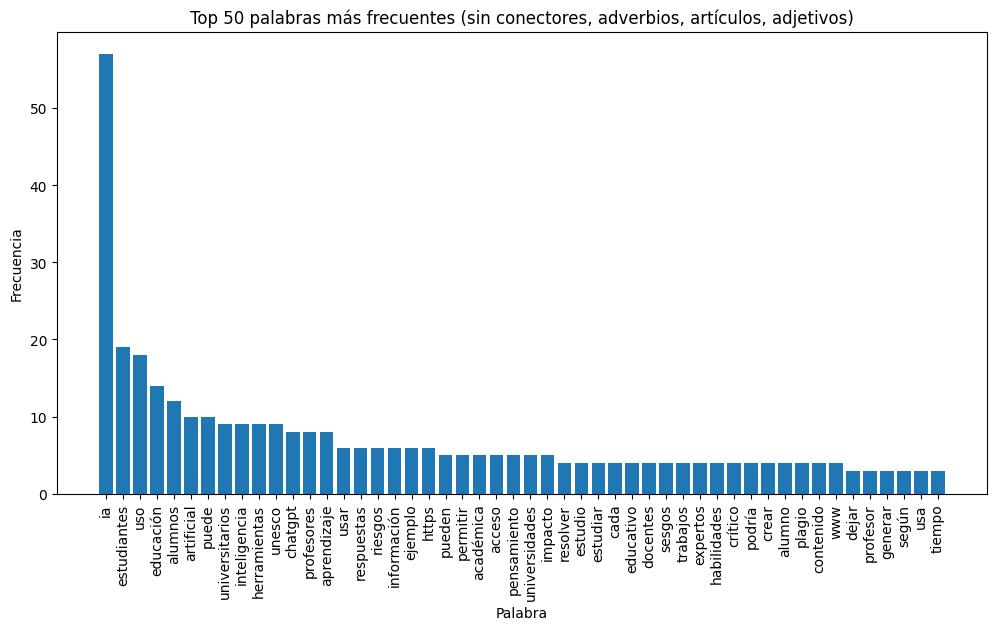

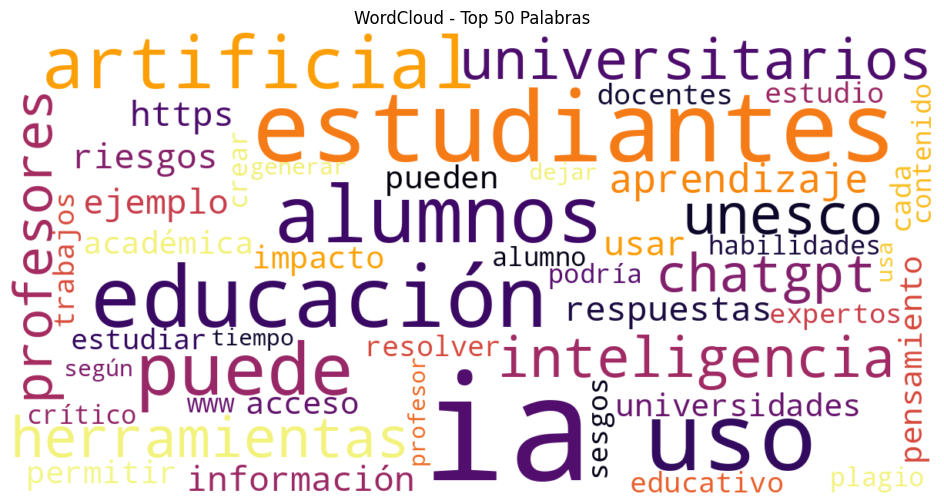

In [3]:



!pip install python-docx wordcloud matplotlib pandas nltk


import re
import docx
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

from google.colab import files
uploaded = files.upload()


file_name = list(uploaded.keys())[0]
doc = docx.Document(file_name)


text = " ".join([para.text for para in doc.paragraphs])


words = re.findall(r'\b[a-záéíóúüñ]+\b', text.lower())

stopwords_es = set(stopwords.words('spanish'))

extra_stopwords = {
    "así", "además", "aunque", "entonces", "también", "pero", "porque", "pues",
    "ya", "solo", "muy", "más", "menos", "casi", "tan", "todo", "toda", "todos", "todas",
    "mismo", "misma", "mismos", "mismas", "gran", "mucho", "muchos", "muchas",
    "algunos", "algunas", "ninguno", "ninguna"
}

stopwords_total = stopwords_es.union(extra_stopwords)


filtered_words = [w for w in words if w not in stopwords_total]


word_counts = Counter(filtered_words)


top_50 = word_counts.most_common(50)


print("🔴 Palabras eliminadas (stopwords y conectores/adjetivos/adverbios):")
print(sorted(list(stopwords_total))[:100])


df = pd.DataFrame(top_50, columns=["Palabra", "Frecuencia"])

plt.figure(figsize=(12,6))
plt.bar(df["Palabra"], df["Frecuencia"])
plt.xticks(rotation=90)
plt.title("Top 50 palabras más frecuentes (sin conectores, adverbios, artículos, adjetivos)")
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.show()


wordcloud = WordCloud(width=1200, height=600, background_color="white", colormap="inferno")\
    .generate_from_frequencies(dict(top_50))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Top 50 Palabras")
plt.show()
